In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('train.csv')

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
def conv(x):
    if(x=='male'):
        x=0
        return x
    else:
        x=1
        return x

In [23]:
data['Sex'] = data['Sex'].apply(conv)

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

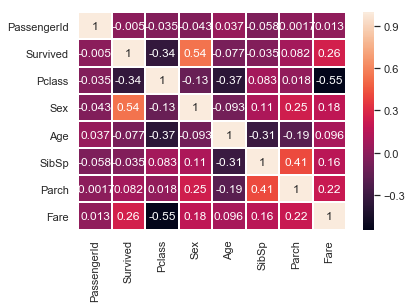

In [26]:
sns.heatmap(data.corr() , annot=True , linewidth=1, linecolor='w')

In [27]:
training_data = data[['PassengerId', 'Pclass', 'Fare', 'Sex']]

In [28]:
output_data = data['Survived']

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X, x_test, Y, y_test = train_test_split(training_data,
                                       output_data,
                                       test_size=0.3,
                                       random_state = 42)

In [31]:
from sklearn.linear_model import LogisticRegression

In [35]:
model = LogisticRegression()

In [36]:
model.fit(X,Y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
predictions = model.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [39]:
confusion_matrix(predictions, y_test)

array([[134,  33],
       [ 23,  78]], dtype=int64)

In [40]:
score = accuracy_score(predictions, y_test)
score

0.7910447761194029

In [41]:
test_data = pd.read_csv('test.csv')

In [42]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [43]:
test_data['Sex'] = test_data['Sex'].apply(conv)

In [44]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [45]:
#test_data = test_data[['PassengerId', 'Pclass', 'Fare', 'Sex']]

In [46]:
#test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           1
Sex            0
dtype: int64

In [47]:
#test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [48]:
#test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
Sex            0
dtype: int64

In [49]:
#test_predictions = model.predict(test_data)

In [50]:
#test_predictions[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [51]:
#test_submission = { 'PassengerId' : test_data['PassengerId'],
                  'Survived' : test_predictions}

In [52]:
#test_submission = pd.DataFrame(test_submission)

In [53]:
#test_submission = test_submission.set_index('PassengerId')

In [55]:
#test_submission.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [56]:
#test_submission.to_csv('newFinalSubmission.csv')

In [57]:
test_data.head()

,PassengerId,Pclass,Fare,Sex
0,892,3,7.8292,0
1,893,3,7.0000,1
2,894,2,9.6875,0
3,895,3,8.6625,0
4,896,3,12.2875,1
